# London - Milestone Project
This project is based on a Kaggle dataset:
https://www.kaggle.com/edenau/london-bike-sharing-system-data

You actually have to retrieve to CSV files there **yourselves**!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
# This won't work for you - at least not directly!
df_stations = pd.read_csv("Data/bike_sharing/stations.csv", index_col="Station ID")
df_journeys = pd.read_csv("Data/bike_sharing/journeys.csv")

In [3]:
df_stations.head()

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,
1,19,51.529163,-0.109970,"River Street , Clerkenwell"
2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


#### London Coordinates
51.5074° N, 0.1278° W

Make sure to correctly convert **N** and **W** when using with a map.

### 1a) Plot Journey Durations
In your journey data, you have the journey duration for all trips. Play around with the plotting tools we talked about - do **journey durations depend on the time of day?**

In [4]:
df_journeys.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


In [5]:
df_journeys["Start Year"].unique()

array([17], dtype=int64)

In [6]:
df_journeys_clean = df_journeys.drop(["End Year", "Start Year"], axis=1)
df_journeys_clean

,Journey Duration,Journey ID,End Date,End Month,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,18,0,478,19,9,17,26,251
1,1800.0,12581,19,9,15,21,122,19,9,14,51,550
2,1140.0,1159,15,9,17,1,639,15,9,16,42,212
3,420.0,2375,14,9,12,16,755,14,9,12,9,163
4,1200.0,14659,13,9,19,33,605,13,9,19,13,36
...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,0,2,32,7,8,23,58,42
1542840,911.0,12348,8,8,0,13,625,7,8,23,58,222
1542841,447.0,8303,8,8,0,7,453,7,8,23,59,130
1542842,424.0,12038,8,8,0,6,405,7,8,23,59,755


In [7]:
df_journeys_clean["Journey Duration m"] = df_journeys_clean["Journey Duration"]/60
df_journeys_clean.drop(["Journey Duration", "Journey ID"], axis=1, inplace=True)
df_journeys_clean

,End Date,End Month,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Hour,Start Minute,Start Station ID,Journey Duration m
0,19,9,18,0,478,19,9,17,26,251,34.000000
1,19,9,15,21,122,19,9,14,51,550,30.000000
2,15,9,17,1,639,15,9,16,42,212,19.000000
3,14,9,12,16,755,14,9,12,9,163,7.000000
4,13,9,19,33,605,13,9,19,13,36,20.000000
...,...,...,...,...,...,...,...,...,...,...,...
1542839,8,8,0,2,32,7,8,23,58,42,4.500000
1542840,8,8,0,13,625,7,8,23,58,222,15.183333
1542841,8,8,0,7,453,7,8,23,59,130,7.450000
1542842,8,8,0,6,405,7,8,23,59,755,7.066667


In [8]:
df_journeys_clean.sample(5)

,End Date,End Month,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Hour,Start Minute,Start Station ID,Journey Duration m
1270588,13,8,17,40,242,13,8,17,4,271,36.233333
530016,3,9,13,4,282,3,9,12,55,507,9.000000
1148444,10,8,7,3,101,10,8,6,54,175,9.566667
996791,19,8,13,3,225,19,8,12,50,2,13.500000
1322622,1,8,8,17,215,1,8,8,12,101,5.550000


In [9]:
df_journeys["Journey Duration"]


0          2040.0
1          1800.0
2          1140.0
3           420.0
4          1200.0
            ...  
1542839     270.0
1542840     911.0
1542841     447.0
1542842     424.0
1542843     307.0
Name: Journey Duration, Length: 1542844, dtype: float64

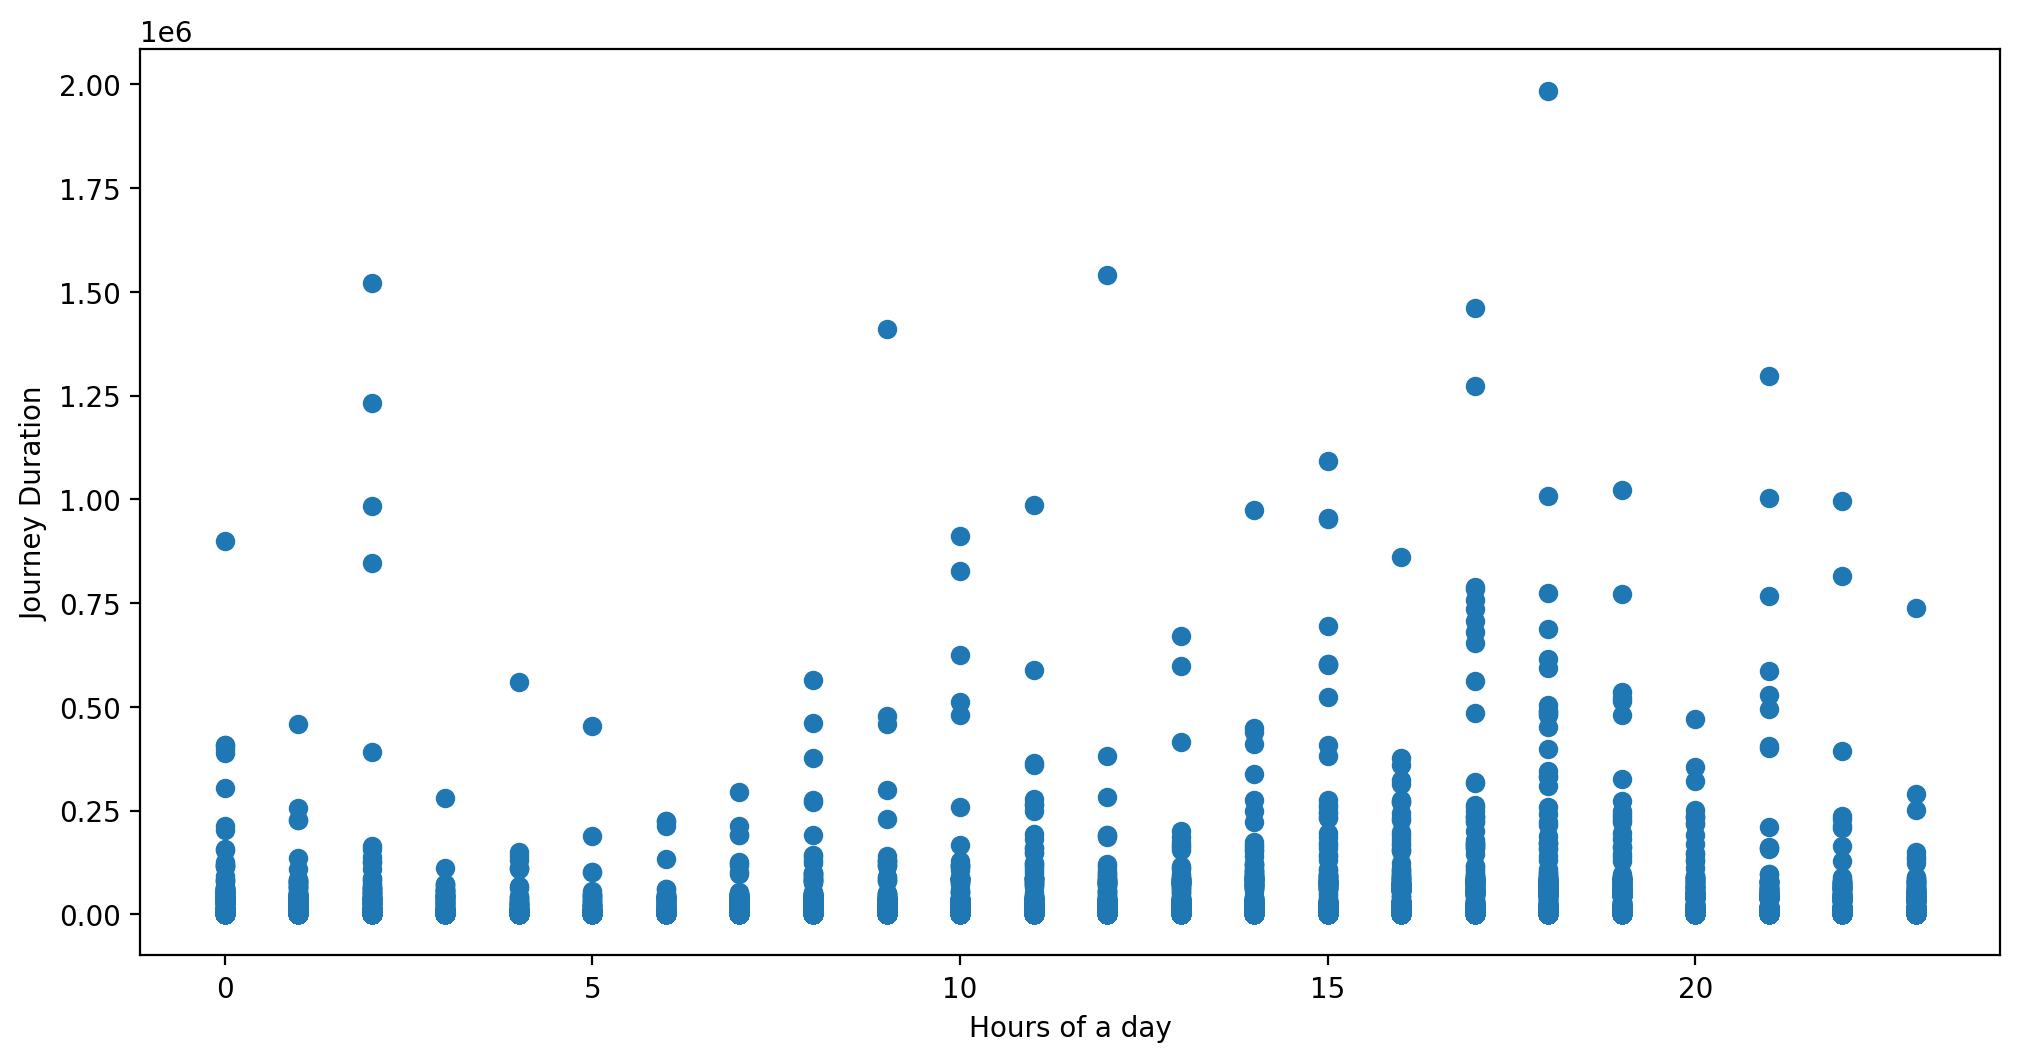

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=200)

scatter = ax.scatter(x = df_journeys["Start Hour"], y = df_journeys["Journey Duration"])

ax.set_ylabel("Journey Duration")
ax.set_xlabel("Hours of a day")

plt.show()

In [ ]:
sns.jointplot(x = "Start Hour", y = "Journey Duration", data=df_journeys, height=12)
plt.show()

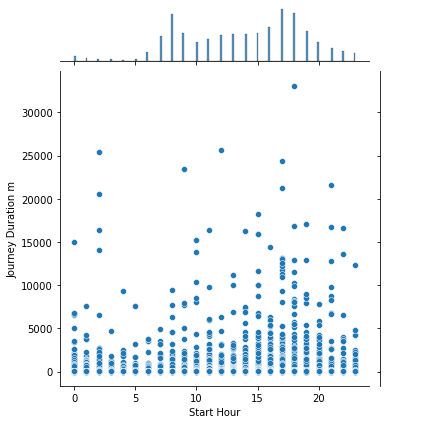

In [12]:
sns.jointplot(x = "Start Hour", y = "Journey Duration m", data=df_journeys_clean, height=6)
plt.show()

In the rush hour (between 7-9; 17-19) are the longest travel durations

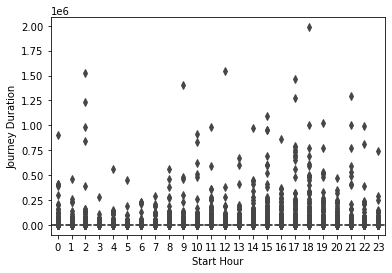

In [13]:
sns.boxplot(x = "Start Hour", y = "Journey Duration", data=df_journeys)
plt.show()

In [ ]:
df_journeys.corr()

In [ ]:
sns.heatmap(df_journeys.corr())
plt.show()

### 1b) Predict Journey Durations
You have lot's of information for the trip. Use just the data that is known at the beginning of the trip (i.e., start time and start station) to predict the journy duration. Use any regression model your a comfortable with.

In [ ]:
df_journeys_clean.describe()

In [14]:
X = df_journeys_clean.drop(["Journey Duration m", "End Date", "End Month", "End Hour", "End Minute"], axis=1)
y = df_journeys_clean["Journey Duration m"]

In [16]:
X.head()

,End Station ID,Start Date,Start Month,Start Hour,Start Minute,Start Station ID
0,478,19,9,17,26,251
1,122,19,9,14,51,550
2,639,15,9,16,42,212
3,755,14,9,12,9,163
4,605,13,9,19,13,36


In [17]:
y

0          34.000000
1          30.000000
2          19.000000
3           7.000000
4          20.000000
             ...    
1542839     4.500000
1542840    15.183333
1542841     7.450000
1542842     7.066667
1542843     5.116667
Name: Journey Duration m, Length: 1542844, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
X_train

,End Station ID,Start Date,Start Month,Start Hour,Start Minute,Start Station ID
369502,480,12,9,15,15,703
652812,331,24,8,7,11,690
1471845,212,5,8,18,8,755
1443757,225,4,8,18,10,153
730682,24,26,8,13,23,4
...,...,...,...,...,...,...
1373398,374,2,8,16,38,433
1228613,457,12,8,14,5,804
681353,802,24,8,19,45,193
1004739,809,19,8,16,8,449


In [20]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

In [21]:
X_train.columns

Index(['End Station ID', 'Start Date', 'Start Month', 'Start Hour',
       'Start Minute', 'Start Station ID'],
      dtype='object')

In [22]:
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
print(lin.intercept_)

22.12427971555292


In [24]:
X_test_scaled = st_scaler.transform(X_test)

In [25]:
y_prediction = lin.predict(X_test_scaled)

In [26]:
y_prediction

array([25.16077454, 26.08759702, 25.26995352, ..., 16.57346427,
       25.32999667, 21.98572947])

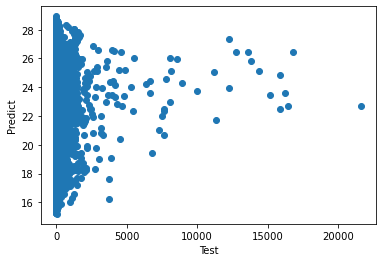

In [27]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Test")
plt.ylabel("Predict")
plt.show ()

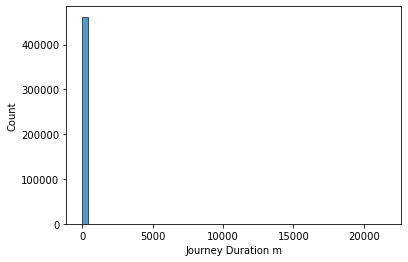

In [28]:
sns.histplot((y_test - y_prediction), bins=50)
plt.show()

In [29]:
np.sqrt(metrics.mean_squared_error(y_test, y_prediction))

111.21022022136397

In [30]:
metrics.mean_absolute_error(y_test, y_prediction)

15.769013879386959

In [31]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df_inverse = st_scaler.inverse_transform(X_test_scaled_df)

### 2a) Stations
In the "Folium" Notebook, I showed you how to create a colored map with some data. Try to create a similar map using the number of stations in the different boroughs of London (provided as GeoJson in this folder)

In [33]:
tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr="Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."

m = folium.Map(location = [51.5, -0.1], zoom_start=9.5, tiles=tiles, attr=attr)
m

In [34]:
df_stations

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,
1,19,51.529163,-0.109970,"River Street , Clerkenwell"
2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"
...,...,...,...,...
190,21,51.489975,-0.132845,"Rampayne Street, Pimlico"
194,56,51.504627,-0.091773,"Hop Exchange, The Borough"
195,30,51.507244,-0.106237,"Milroy Walk, South Bank"


In [35]:
geodata = pd.read_json("data/boroughs.geojson")
geodata["features"][1]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-0.183361, 51.668682],
     [-0.183383, 51.668742],
     [-0.184222, 51.668701],
     [-0.18620899999999999, 51.66807],
     [-0.18737199999999998, 51.666684],
     [-0.187886, 51.66605],
     [-0.187808, 51.66602],
     [-0.188751, 51.664913],
     [-0.189363, 51.664176],
     [-0.18942599999999998, 51.664139],
     [-0.189554, 51.664267],
     [-0.189602, 51.66435],
     [-0.18964399999999998, 51.664398],
     [-0.189689, 51.664437],
     [-0.19000599999999998, 51.66464],
     [-0.190135, 51.664701],
     [-0.190302, 51.664757],
     [-0.190463, 51.664844],
     [-0.19062199999999999, 51.664895],
     [-0.19075899999999998, 51.66493],
     [-0.192417, 51.665256],
     [-0.19241799999999998, 51.665256],
     [-0.19358399999999998, 51.66542],
     [-0.195068, 51.665689],
     [-0.194466, 51.666563],
     [-0.194026, 51.667266],
     [-0.193741, 51.667706],
     [-0.193713, 51.667823],
     [-0.193271, 51.668

In [37]:
tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr="Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."

m = folium.Map(location = [51.5, -0.1], zoom_start=9.5, tiles=tiles, attr=attr)

folium.Choropleth(
    geo_data=f"data/boroughs.geojson",
    name="choropleth",
    data=df_stations,
    columns=tuple("Latitude", "Longitude"),
    key_on={"geometry.coordinates"},
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

m

TypeError: tuple expected at most 1 argument, got 2

In [38]:
m = folium.Map(location = [51.5, -0.1], zoom_start=9.5, tiles=tiles, attr=attr)

folium.Choropleth(
    geo_data=f"data/boroughs.geojson",  # geojson file with spatial/geographical information
    data = df_stations,
    columns = ["Latitude", "Longitude"],
    key_on= "feature.geometry.coordinates", # connect dataframe and geojson information
    fill_color='YlGn', # Find more here: https://github.com/dsc/colorbrewer-python
    fill_opacity = 0.5,
    line_opacity = 0.2, 
    legend_name="Capacity").add_to(m)

m

TypeError: unhashable type: 'list'

In [63]:
m = folium.Map(location = [51.5, -0.1], zoom_start=9.5, tiles=tiles, attr=attr)

folium.Choropleth(
    geo_data=f"data/boroughs.geojson",  # geojson file with spatial/geographical information
    data = df_stations,
    columns = ["Latitude", "Longitude"],
 #   key_on= ["feature.geometry.coordinates"], # connect dataframe and geojson information
    fill_color='YlGn', # Find more here: https://github.com/dsc/colorbrewer-python
    fill_opacity = 0.5,
    line_opacity = 0.2, 
    legend_name="Capacity").add_to(m)

m

In [ ]:
m

### 2b) Coordinates
You know the stations' coordinates. Try to add two new columns to the journey DataFrame - Start Coordinate and End Coordinate

In [40]:
df_stations.head(3)

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,
1,19,51.529163,-0.109970,"River Street , Clerkenwell"
2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"


In [42]:
df_journeys.head(3)

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212


In [71]:
a = 0
df_journeys_edit = df_journeys

# for index in range(len(df_journeys)):
#     df_journeys["Start Station Latitude"][index] = stations[]
    
# print(a)    

In [72]:
df_journeys["Start Station ID"][0]

251

In [73]:
df_stations["Latitude"][251]

51.518908

In [88]:
df_journeys_edit["Start Station Latitude"] = 0.11111
df_journeys_edit["Start Station Longitude"] = 0.2222
df_journeys_edit["End Station Latitude"] = 0.333
df_journeys_edit["End Station Longitude"] = 0.444
df_journeys_edit

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,0.11111,0.2222,0.333,0.444
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,0.11111,0.2222,0.333,0.444
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,0.11111,0.2222,0.333,0.444
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,0.11111,0.2222,0.333,0.444
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,0.11111,0.2222,0.333,0.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,17,0,2,32,7,8,17,23,58,42,0.11111,0.2222,0.333,0.444
1542840,911.0,12348,8,8,17,0,13,625,7,8,17,23,58,222,0.11111,0.2222,0.333,0.444
1542841,447.0,8303,8,8,17,0,7,453,7,8,17,23,59,130,0.11111,0.2222,0.333,0.444
1542842,424.0,12038,8,8,17,0,6,405,7,8,17,23,59,755,0.11111,0.2222,0.333,0.444


In [111]:
# for index in range(len(df_journeys)):
#     df_journeys_edit["Start Station Latitude"][index] = df_stations["Latitude"][df_journeys["Start Station ID"][index]]
#     df_journeys_edit["Start Station Longitude"][index] = df_stations["Longitude"][df_journeys["Start Station ID"][index]]
#     df_journeys_edit["End Station Latitude"][index] = df_stations["Latitude"][df_journeys["End Station ID"][index]]
#     df_journeys_edit["End Station Longitude"][index] = df_stations["Longitude"][df_journeys["End Station ID"][index]]

# fails at 201

for index in range(0,10):
    df_journeys_edit["Start Station Latitude"][index] = df_stations["Latitude"][df_journeys["Start Station ID"][index]]
    df_journeys_edit["Start Station Longitude"][index] = df_stations["Longitude"][df_journeys["Start Station ID"][index]]
    df_journeys_edit["End Station Latitude"][index] = df_stations["Latitude"][df_journeys["End Station ID"][index]]
    df_journeys_edit["End Station Longitude"][index] = df_stations["Longitude"][df_journeys["End Station ID"][index]]


df_journeys_edit.head(20)

<ipython-input-111-f458e90e1053>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_journeys_edit["Start Station Latitude"][index] = df_stations["Latitude"][df_journeys["Start Station ID"][index]]
<ipython-input-111-f458e90e1053>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_journeys_edit["Start Station Longitude"][index] = df_stations["Longitude"][df_journeys["Start Station ID"][index]]
<ipython-input-111-f458e90e1053>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,51.518908,-0.079249,51.521889,-0.046670
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,51.521564,-0.039264,51.521113,-0.078869
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,51.506584,-0.199004,51.483570,-0.202038
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,51.493184,-0.167894,51.485121,-0.174971
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,51.501737,-0.184980,51.520331,-0.163667
5,1320.0,2351,14,9,17,14,53,514,14,9,17,14,31,589,51.487196,-0.179369,51.516204,-0.155525
6,720.0,7252,17,9,17,17,12,484,17,9,17,17,0,478,51.521889,-0.046670,51.528828,-0.013258
7,720.0,9782,17,9,17,17,12,484,17,9,17,17,0,478,51.521889,-0.046670,51.528828,-0.013258
8,540.0,13500,15,9,17,13,42,367,15,9,17,13,33,153,51.511933,-0.174411,51.517372,-0.164207
9,960.0,11205,15,9,17,16,3,350,15,9,17,15,47,396,51.518090,-0.163609,51.501715,-0.179854


In [112]:
df_stations.isnull()

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
190,False,False,False,False
194,False,False,False,False
195,False,False,False,False


### 2c) Predict direction
Knowing the coordinate you can calculate it's distance to the city center (you just have to find out how!). Create two more columns in your journey DataFrame, Start Distance and End Distance. Based on these, create another column - direction - that indicates whether the journey is inbound (i.e., towards the city center), or outbound.
Use this column as target for a binary classification. As features, use only start time and start distance!

### Extra - Revisit 1b)
Using not only the start time (and Station ID), but also the start distance (from city center), does your regression for journey durations improve?

### Extra - Plotting
We have been talking quite a bit about beautiful visualizations. Try to be creative and create some! 

In [ ]:
°